In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import helper as hp
df = pd.read_csv('../DataSets/weatherAUS.csv')
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
X = pd.read_csv('../DataSets/weatherAUS.csv')
X.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
X.pop('Date')
Y = X.pop('RainTomorrow')
Y = pd.DataFrame(Y)
preprocess = hp.preProcessing(df=X)

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Data Cleaning

In [4]:
numeric_cols = preprocess.dtype_select(dtypes=np.number)
cat_cols = preprocess.dtype_select(dtypes='object')

In [5]:
#Impute Numeric Values
X[numeric_cols] = preprocess.impute(numeric_cols=numeric_cols)

In [6]:
#Scale Numeric Values
X[numeric_cols] = preprocess.minMax(numeric_cols=numeric_cols)
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.487850,0.529964,0.006334,0.037741,0.526244,0.263337,0.107619,0.214151,0.688268,0.514493,0.614125,0.610527,0.492351,0.499917,0.510276,0.520023
std,0.150784,0.134343,0.022817,0.021926,0.189061,0.101797,0.068099,0.100214,0.189607,0.205470,0.111557,0.106920,0.253806,0.234384,0.136727,0.131916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.700000,0.514493,0.614125,0.610527,0.492351,0.499917,0.506329,0.512476
75%,0.596698,0.623819,0.002156,0.037741,0.600000,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Replacing NaN With Unknown So As To Avoid The Encoding To Throw An Error
X[cat_cols] = X[cat_cols].fillna('Unknown')
X[cat_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [8]:
#Encode Categorical Column Values
X[cat_cols] = preprocess.one_hot(cat_cols=cat_cols)
for col in cat_cols:
    X.pop(col)

/Users/anshumantekriwal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [9]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037741,0.526244,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,0.266509,0.533081,0.000000,0.037741,0.526244,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.285377,0.568998,0.000000,0.037741,0.526244,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.327830,0.599244,0.000000,0.037741,0.526244,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
#Check Y For NaN Values
print(Y.isna().sum())
# Change NaN To Most Common Category
Y = Y.replace(np.nan, 'No')
#ReCheck Y For NaN Values
Y.isna().sum()

RainTomorrow    0
dtype: int64


RainTomorrow    0
dtype: int64

# Data Exploration/Data Analysis

In [11]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,...,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.487850,0.529964,0.006334,0.037741,0.526244,0.263337,0.107619,0.214151,0.688268,0.514493,...,0.075135,0.064196,0.056433,0.064665,0.026068,0.069680,0.060829,0.065567,0.776577,0.223423
std,0.150784,0.134343,0.022817,0.021926,0.189061,0.101797,0.068099,0.100214,0.189607,0.205470,...,0.263610,0.245103,0.230756,0.245935,0.159337,0.254607,0.239018,0.247525,0.416541,0.416541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.193798,0.053846,0.149425,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.700000,0.514493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.596698,0.623819,0.002156,0.037741,0.600000,0.310078,0.146154,0.275862,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
exploration_copy = X.copy()
exploration_copy['RainTomorrow'] = df['RainTomorrow']
#Mapping Y Values
raintom_vals = {'No': 0, 'Yes': 1}
exploration_copy['RainTomorrow'] = df.RainTomorrow.map(raintom_vals)
Y['RainTomorrow'] = df.RainTomorrow.map(raintom_vals)

<AxesSubplot:ylabel='Frequency'>

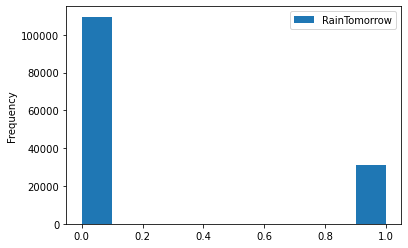

In [13]:
exploration_copy.plot(x='RainToday_Yes',y='RainTomorrow',kind='hist')

In [14]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037741,0.526244,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,0.266509,0.533081,0.000000,0.037741,0.526244,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.285377,0.568998,0.000000,0.037741,0.526244,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.327830,0.599244,0.000000,0.037741,0.526244,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Train/Test Split

In [15]:
year = pd.to_datetime(df.Date).dt.year

train_X = exploration_copy[year<2015]
val_X = exploration_copy[year==2015]
test_X = exploration_copy[year>2015]

In [16]:
train_Y = train_X.pop('RainTomorrow')
val_Y = val_X.pop('RainTomorrow')
test_Y = test_X.pop('RainTomorrow')

# Model 

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
%%time
model.fit(train_X, train_Y)

CPU times: user 242 ms, sys: 14.2 ms, total: 256 ms
Wall time: 257 ms


DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
val_preds = model.predict(val_X)
accuracy_score(val_Y, val_preds)

0.8348060155655685

# Finding Best `max_depth` Fit

In [22]:
def maxdepth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_X, train_Y)
    
    train_preds = model.predict(train_X)
    val_preds = model.predict(val_X)
    test_preds = model.predict(test_X)

    train_acc = accuracy_score(train_Y, train_preds)
    val_acc = accuracy_score(val_Y, val_preds)
    test_acc = accuracy_score(test_Y, test_preds)
    return {"Max Depth ": md, "Train Acc":train_acc, "Val Acc":val_acc, "Test Acc":test_acc, "Avg Acc":(val_acc+test_acc)/2}

In [23]:
%%time
errors_df = pd.DataFrame([maxdepth_error(md) for md in range(1, 21)])
errors_df

CPU times: user 16.3 s, sys: 67.9 ms, total: 16.4 s
Wall time: 16.4 s


,Max Depth,Train Acc,Val Acc,Test Acc,Avg Acc
0,1,0.818059,0.823512,0.810463,0.816988
1,2,0.823070,0.829305,0.818009,0.823657
2,3,0.831592,0.834806,0.821859,0.828333
3,4,0.837847,0.838376,0.827577,0.832976
4,5,0.842756,0.841887,0.830805,0.836346
5,6,0.846869,0.844110,0.832983,0.838547
6,7,0.850941,0.845339,0.833411,0.839375
7,8,0.855186,0.845983,0.832283,0.839133
8,9,0.860575,0.845281,0.832439,0.838860
9,10,0.868198,0.845047,0.832517,0.838782


In [24]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.862627
5,WindGustSpeed,0.073141
2,Rainfall,0.037307
4,Sunshine,0.026924
82,WindDir9am_E,0.000000
77,WindGustDir_SW,0.000000
78,WindGustDir_Unknown,0.000000
79,WindGustDir_W,0.000000
80,WindGustDir_WNW,0.000000
81,WindGustDir_WSW,0.000000


# Visualising Models

In [25]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

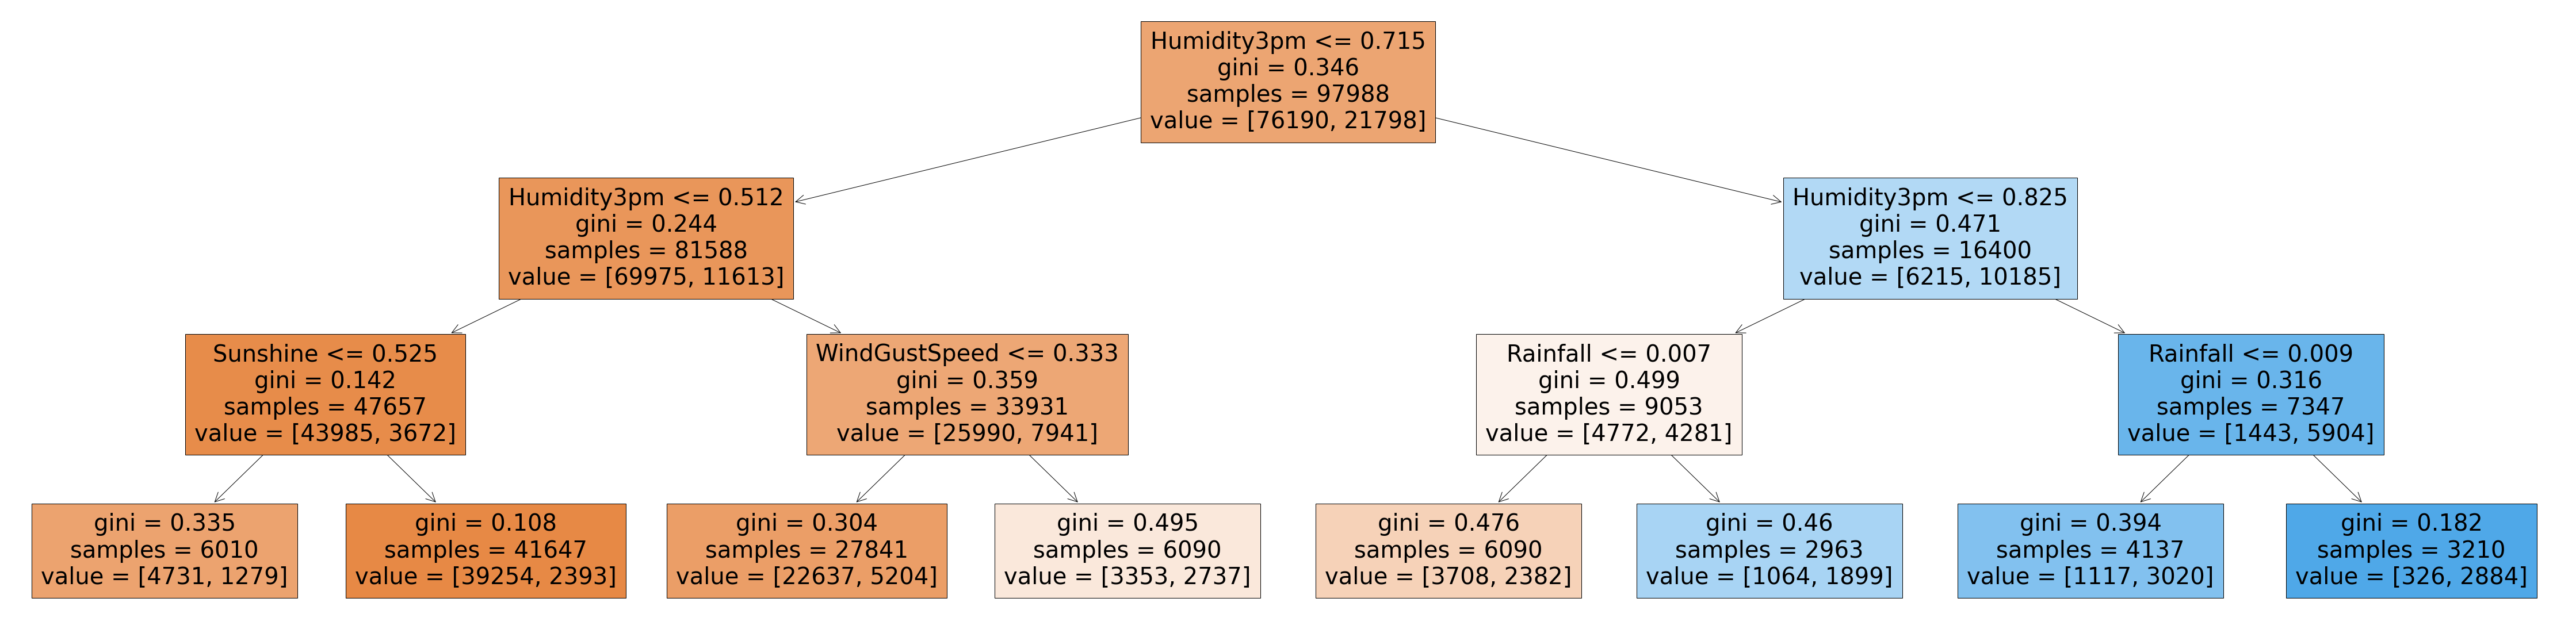

In [26]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X.columns, filled=True);

In [27]:
tree_text = export_text(model, max_depth=10, feature_names=list(X.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- class: 0
|   |   |--- Sunshine >  0.53
|   |   |   |--- class: 0
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: 0
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: 0
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: 1
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: 1
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: 1



In [28]:
aus_rain = {
    'model': model,
    'train_X': train_X,
    'train_Y': train_Y,
    'num_cols': numeric_cols,
    'cat_cols': cat_cols,
}

In [29]:
import joblib
joblib.dump(aus_rain, '../models/trees_ausRain.joblib')

['../models/trees_ausRain.joblib']